In [2]:
from collections import Counter

import pandas as pd
import torch
from kge.job.eval import EvaluationJob
from kge.model import KgeModel
from kge.util.io import load_checkpoint
from functools import reduce

PATH = "/work/dhuynh/Workspaces/Thesis/kge/local/experiments/error_analysis"

checkpoint = load_checkpoint(f'{PATH}/best_models/ICLR20/ComplEx/FB237/ER_standard/checkpoint_best.pt')
model = KgeModel.create_from(checkpoint)

# load data
model.dataset.relation_strings(torch.Tensor([1,]).long())
model.dataset.entity_strings(torch.Tensor([1,]).long())

relation_embedder = model.get_p_embedder()
meta_relation = model.dataset._meta['relation_strings']
meta_entity = model.dataset._meta['entity_strings']

Loading configuration of dataset fb15k-237 from /work/dhuynh/Workspaces/Thesis/kge/data/fb15k-237 ...
Loaded 237 keys from map relation_ids
Setting reciprocal_relations_model.base_model.entity_embedder.dropout to 0., was set to -0.18433461524546146.
Loaded 237 keys from map relation_strings
Loaded 14541 keys from map entity_ids
Loaded 14541 keys from map entity_strings


In [3]:
import pandas as pd

df_ranking_training = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_er_error_analysis_ranking_train.csv')
df_ranking_training['eval_type'] = 'train'
relation_type = df_ranking_training[['name_relation', 'relation_type']].drop_duplicates().set_index('name_relation').to_dict()['relation_type']

df_metric_training = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_er_error_analysis_metric_train.csv')
df_metric_training['eval_type'] = 'train'
df_metric_training = df_metric_training.rename(columns={'relation': 'name_relation'})

df_ranking_training = df_ranking_training.merge(df_metric_training[['name_relation', 
                                                                    'mean_reciprocal_rank_filtered_with_test_relation_standard',
                                                                    'mean_reciprocal_rank_filtered_with_test_relation_hybrid']]\
                                                        .rename(columns={'mean_reciprocal_rank_filtered_with_test_relation_standard': 'MRR_standard',
                                                                        'mean_reciprocal_rank_filtered_with_test_relation_hybrid': 'MRR_hybrid'}),
                                                on='name_relation', how='left')

df_ranking_training.head(2)

,id,name_subjects,name_relation,name_objects,relation_type,triplet,po_to_s_hybrid,po_to_s_standard,predicted_object_hybrid,predicted_object_scores_hybrid,...,predicted_subject_score_hybrid,predicted_subject_score_standard,predicted_subject_standard,so_to_p_hybrid,so_to_p_standard,sp_to_o_hybrid,sp_to_o_standard,eval_type,MRR_standard,MRR_hybrid
0,0,Dominican Republic,/location/country/form_of_government,Republic,M-N,Dominican Republic | /location/country/form_of...,0,0,['Republic' 'Democracy' 'Presidential system' ...,"[12.639413833618164, 12.148118019104004, 9.887...",...,"[13.219581604003906, 13.124237060546875, 13.03...","[12.350879669189453, 12.33768367767334, 12.332...",['Burundi' 'Djibouti' 'Uganda' 'Mozambique' 'C...,0,3,0,0,train,0.391504,1.0
1,1,Mighty Morphin Power Rangers,/tv/tv_program/regular_cast./tv/regular_tv_app...,Wendee Lee,1-N,Mighty Morphin Power Rangers | /tv/tv_program/...,0,0,['Wendee Lee' 'Johnny Yong Bosch' 'Lauren Tom'...,"[15.638628005981445, 14.987711906433105, 8.738...",...,"[15.638628005981445, 9.389434814453125, 8.5438...","[19.59046173095703, 14.622334480285645, 11.704...",['Mighty Morphin Power Rangers' 'Power Rangers...,0,0,0,0,train,0.145519,1.0


In [4]:
df_ranking_validation = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_er_error_analysis_ranking_valid.csv')
df_ranking_validation['eval_type'] = 'valid'
df_ranking_validation.head(2)

df_metric_validation = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_er_error_analysis_metric_valid.csv')
df_metric_validation['eval_type'] = 'valid'
df_metric_validation = df_metric_validation.rename(columns={'relation': 'name_relation'})

df_ranking_validation = df_ranking_validation.merge(df_metric_validation[['name_relation', 
                                                                          'mean_reciprocal_rank_filtered_with_test_relation_standard',
                                                                          'mean_reciprocal_rank_filtered_with_test_relation_hybrid']]\
                                                                  .rename(columns={'mean_reciprocal_rank_filtered_with_test_relation_standard': 'MRR_standard',
                                                                                  'mean_reciprocal_rank_filtered_with_test_relation_hybrid': 'MRR_hybrid'}),
                                                          on='name_relation', how='left')

df_ranking_validation.head(2)

,id,name_subjects,name_relation,name_objects,relation_type,triplet,po_to_s_hybrid,po_to_s_standard,predicted_object_hybrid,predicted_object_scores_hybrid,...,predicted_subject_score_hybrid,predicted_subject_score_standard,predicted_subject_standard,so_to_p_hybrid,so_to_p_standard,sp_to_o_hybrid,sp_to_o_standard,eval_type,MRR_standard,MRR_hybrid
0,0,American Pie,/film/film/genre,Romance Film,M-N,American Pie | /film/film/genre | Romance Film,89,46,['Comedy' 'Romance Film' 'Drama (Film genre) #...,"[9.142095565795898, 9.105622291564941, 9.05726...",...,"[11.852099418640137, 11.806869506835938, 11.79...","[11.017631530761719, 11.014710426330566, 11.00...",['My Man Godfrey' 'Role Models' 'The Turning P...,0,5,0,0,valid,0.212496,0.989566
1,1,St. Louis,/location/location/time_zones,Central Time Zone,M-1,St. Louis | /location/location/time_zones | Ce...,0,0,['Central Time Zone' 'Eastern Time Zone' 'Paci...,"[10.764883995056152, 10.094369888305664, 8.877...",...,"[13.081178665161133, 13.077563285827637, 13.03...","[9.2621488571167, 9.251993179321289, 9.2120313...",['Porter County' 'Davidson County' 'Denton'\n ...,0,2,0,0,valid,0.590040,1.000000


In [5]:
df_relation_similarity = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_error_analysis_relation_similarity.csv')
df_relation_similarity

,pair_relation,cosine_sim_standard_Hybrid,cosine_sim_standard_ER,cosine_sim_hybrid_Hybrid,cosine_sim_hybrid_ER
0,/american_football/football_team/current_roste...,-0.104892,0.092078,0.130913,-0.017204
1,/american_football/football_team/current_roste...,0.064897,0.023882,0.410136,0.098994
2,/american_football/football_team/current_roste...,0.014647,-0.013251,0.367712,0.103778
3,/american_football/football_team/current_roste...,-0.056359,0.055919,0.253017,0.137882
4,/american_football/football_team/current_roste...,0.024058,-0.025661,0.388793,0.186660
...,...,...,...,...,...
27961,/user/tsegaran/random/taxonomy_subject/entry./...,-0.005677,-0.072310,0.354967,0.080502
27962,/user/tsegaran/random/taxonomy_subject/entry./...,0.052820,-0.002278,0.236273,0.041826
27963,/user/tsegaran/random/taxonomy_subject/entry./...,-0.069270,-0.032342,0.119281,0.036081
27964,/user/tsegaran/random/taxonomy_subject/entry./...,0.030504,0.041609,0.289697,0.048771


In [6]:
import ast
df_similar_so = pd.read_csv('results/ICLR20/ComplEx/FB237/fb237_error_analysis_relations_in_similar_so_all.csv')
df_similar_so['name_relation'] = df_similar_so.name_relation.map(lambda x: ast.literal_eval(x))
df_similar_so.head(2)

,so_pair,name_relation,eval_type,relation_type,counts,is_similar,so_to_p_standard_Hybrid,so_to_p_standard_ER,so_to_p_hybrid_Hybrid,so_to_p_hybrid_ER,...,predicted_relation_hybrid_Hybrid,predicted_relation_hybrid_ER,euclidean_dist_standard_Hybrid,euclidean_dist_standard_ER,euclidean_dist_hybrid_Hybrid,euclidean_dist_hybrid_ER,cosine_sim_standard_Hybrid,cosine_sim_standard_ER,cosine_sim_hybrid_Hybrid,cosine_sim_hybrid_ER
0,"(500) Days of Summer, _ ,2009 Sundance Film Fe...","(/film/film/film_festivals, /film/film/release...",train,"('M-1', 'M-1')","(280, 262)",True,"(0, 0)","(2, 1)","(0, 0)","(0, 0)",...,/film/film/release_date_s./film/film_regional_...,/film/film/film_festivals,13.807630,3.476251,12.885740,10.733234,0.727376,0.525105,0.663774,0.627073
1,"(500) Days of Summer, _ ,United Kingdom",(/film/film/distributors./film/film_film_distr...,train,"('M-1', 'M-N')","(168, 14121)",False,"(0, 1)","(6, 12)","(0, 0)","(0, 0)",...,/film/film/release_date_s./film/film_regional_...,/film/film/release_date_s./film/film_regional_...,13.493464,4.926343,15.633004,15.075353,0.601617,0.199831,0.232598,0.229358


In [7]:
df_similar_so[df_similar_so.relation_type.isin(["('M-1', '1-N')"])].name_relation.unique()

array([('/film/film/executive_produced_by', '/film/film/personal_appearances./film/personal_film_appearance/person'),
       ('/film/film/music', '/film/film/personal_appearances./film/personal_film_appearance/person'),
       ('/film/film/costume_design_by', '/film/film/personal_appearances./film/personal_film_appearance/person'),
       ('/film/film/other_crew./film/film_crew_gig/crewmember', '/film/film/personal_appearances./film/personal_film_appearance/person'),
       ('/film/film/produced_by', '/tv/tv_program/regular_cast./tv/regular_tv_appearance/actor')],
      dtype=object)

In [8]:
list_relation_in_so = list(set(sum(df_similar_so.name_relation.unique(), ())))
list_relation_in_so[:3]

['/sports/sports_position/players./sports/sports_team_roster/position',
 '/tv/tv_network/programs./tv/tv_network_duration/program',
 '/tv/tv_program/regular_cast./tv/regular_tv_appearance/actor']

In [9]:
import numpy as np
import ast
import re

def get_list_relation(relations):
    output = tuple(ast.literal_eval(re.sub(r"'\n '", "', '", re.sub(r"' '", "', '", relations))))
    if len(output) != 3 or output == None:
        print(relations)
        print(re.sub(r"'\n '", "', '", re.sub(r"' '", "', '", relations)))
        print(output)
        raise ValueError('wrong number of relations')
    return output

relation_type = df_ranking_training[['name_relation', 'relation_type']].drop_duplicates().set_index('name_relation').to_dict()['relation_type']

def get_relation_type(relations_tuple):
    output = []
    try:
        for rel in relations_tuple:
            output.append(relation_type[rel])
    except Exception:
        print('relations_tuple', relations_tuple)
        raise ValueError('wrong number of relations')
    return tuple(output)

subjects_objects_of_relations_train = {}
for relation in df_ranking_training.name_relation.unique():
    subjects_objects_of_relations_train[relation] = {
        'subjects': set(df_ranking_training[df_ranking_training.name_relation == relation].name_subjects),
        'objects': set(df_ranking_training[df_ranking_training.name_relation == relation].name_objects)
    }
    

def get_jaccard_sim(relation_pair, target):
    list_sets = []
    for rel in relation_pair:        
        list_sets.append(subjects_objects_of_relations_train[rel][target])
    def jaccard_similarity(set_1, set_2):
        return np.maximum(np.round(len(set_1.intersection(set_2)) / len(set_1.union(set_2)), 2), 0.00001)
    return jaccard_similarity(list_sets[0], list_sets[1])

def get_jaccard_sim_top3(row, origin, target):
    output = []
    relations = row[origin]
    name_relation = row.name_relation
    # print(df.head(2))
    for relation in relations:
        tmp = get_jaccard_sim((name_relation, relation), target)
        output.append(tmp)
    return tuple(output)

def harmonic_mean(x):
    return len(x) / sum(1 / i for i in x)


# Standard Model selected on entity MRR (Baseline model)

In [10]:
columns = ['name_subjects', 'name_relation', 'name_objects', 'relation_type', 'eval_type',
           'predicted_relation_standard', 'so_to_p_standard', 'MRR_standard']
df_std_er_ranking = pd.concat([df_ranking_training[columns].copy(), df_ranking_validation[columns].copy()])

df_std_er_ranking['predicted_relation_standard'] = df_std_er_ranking['predicted_relation_standard'].map(lambda x: get_list_relation(x))
df_std_er_ranking['predicted_relation_type_standard'] = df_std_er_ranking['predicted_relation_standard'].map(lambda x: get_relation_type(x))

df_std_er_ranking.tail(2)

,name_subjects,name_relation,name_objects,relation_type,eval_type,predicted_relation_standard,so_to_p_standard,MRR_standard,predicted_relation_type_standard
17533,50/50,/film/film/release_date_s./film/film_regional_...,Singapore,M-N,valid,"(/education/educational_institution/campuses, ...",8,0.085534,"(1-1, 1-1, 1-N)"
17534,Selena Gomez,/film/actor/film./film/performance/film,Hotel Transylvania,M-N,valid,(/tv/tv_program/tv_producer./tv/tv_producer_te...,16,0.052310,"(M-1, M-1, M-1)"


In [11]:
get_jaccard_sim(('/people/person/places_lived./people/place_lived/location','/people/person/place_of_birth'), 'subjects')
get_jaccard_sim(('/people/person/places_lived./people/place_lived/location','/people/person/place_of_birth'), 'objects')

0.49

In [12]:
df_std_er_ranking

,name_subjects,name_relation,name_objects,relation_type,eval_type,predicted_relation_standard,so_to_p_standard,MRR_standard,predicted_relation_type_standard
0,Dominican Republic,/location/country/form_of_government,Republic,M-N,train,(/tv/tv_program/tv_producer./tv/tv_producer_te...,3,0.391504,"(M-1, M-1, M-1)"
1,Mighty Morphin Power Rangers,/tv/tv_program/regular_cast./tv/regular_tv_app...,Wendee Lee,1-N,train,(/tv/tv_program/regular_cast./tv/regular_tv_ap...,0,0.145519,"(1-N, M-1, M-1)"
2,Drama (Film genre) #99,/media_common/netflix_genre/titles,American History X,M-N,train,"(/time/event/instance_of_recurring_event, /fil...",4,0.255979,"(M-1, M-1, M-1)"
3,Michelle Rodriguez,/award/award_winner/awards_won./award/award_ho...,Naveen Andrews,M-N,train,"(/education/educational_institution/campuses, ...",11,0.097594,"(1-1, 1-1, 1-1)"
4,Australia national association football team,/soccer/football_team/current_roster./sports/s...,Midfielder,M-N,train,"(/award/award_category/category_of, /business/...",12,0.087628,"(M-1, M-1, M-1)"
...,...,...,...,...,...,...,...,...,...
17530,Independent Spirit Award for Best Female Lead,/award/award_category/nominees./award/award_no...,My Week with Marilyn,M-N,valid,(/location/statistical_region/gdp_nominal./mea...,16,0.088463,"(M-1, M-1, M-1)"
17531,K-19: The Widowmaker,/film/film/other_crew./film/film_crew_gig/film...,Special Effects Supervisor,M-N,valid,(/base/aareas/schema/administrative_area/admin...,4,0.152004,"(M-1, M-1, M-1)"
17532,Chris Isaak,/common/topic/webpage./common/webpage/category,Official Website,M-1,valid,(/common/topic/webpage./common/webpage/categor...,0,0.933637,"(M-1, M-1, M-1)"
17533,50/50,/film/film/release_date_s./film/film_regional_...,Singapore,M-N,valid,"(/education/educational_institution/campuses, ...",8,0.085534,"(1-1, 1-1, 1-N)"


In [13]:
import seaborn as sns
result_objects = df_std_er_ranking[['name_relation', 'relation_type', 'predicted_relation_standard', 'eval_type', 'MRR_standard']].copy()
result_objects['ranks'] = result_objects.apply(lambda row: get_jaccard_sim_top3(row, 'predicted_relation_standard', 'objects'), axis=1)
result_objects[['First rank', 'Second rank', 'Third rank']] = pd.DataFrame(result_objects['ranks'].tolist(), index=result_objects.index)
result_objects = result_objects.drop(['ranks'], axis=1)
result_objects_plt = result_objects.groupby(['name_relation', 'relation_type', 'eval_type']).mean().reset_index()\
    .melt(id_vars=['name_relation', 'relation_type', 'eval_type', 'MRR_standard'], 
          value_vars=['First rank', 'Second rank', 'Third rank'], 
          var_name='rank', value_name='jaccard_sim')
result_objects_plt
result_subjects = df_std_er_ranking[['name_relation', 'relation_type', 'predicted_relation_standard', 'eval_type', 'MRR_standard']].copy()
result_subjects['ranks'] = result_subjects.apply(lambda row: get_jaccard_sim_top3(row, 'predicted_relation_standard', 'subjects'), axis=1)
result_subjects[['First rank', 'Second rank', 'Third rank']] = pd.DataFrame(result_subjects['ranks'].tolist(), index=result_subjects.index)
result_subjects = result_subjects.drop(['ranks'], axis=1)
result_subjects_plt = result_subjects.groupby(['name_relation', 'relation_type', 'eval_type']).mean().reset_index()\
    .melt(id_vars=['name_relation', 'relation_type', 'eval_type', 'MRR_standard'], 
          value_vars=['First rank', 'Second rank', 'Third rank'], 
          var_name='rank', value_name='jaccard_sim')

result_objects_plt['target'] = 'objects'
result_subjects_plt['target'] = 'subjects'
result_subjects_plt

,name_relation,relation_type,eval_type,MRR_standard,rank,jaccard_sim,target
0,/american_football/football_team/current_roste...,M-N,train,0.390896,First rank,0.000010,subjects
1,/american_football/football_team/current_roste...,M-N,valid,0.200000,First rank,0.000010,subjects
2,/award/award_category/category_of,M-1,train,0.906660,First rank,0.885136,subjects
3,/award/award_category/category_of,M-1,valid,0.934066,First rank,0.923078,subjects
4,/award/award_category/disciplines_or_subjects,M-N,train,0.337977,First rank,0.089127,subjects
...,...,...,...,...,...,...,...
1375,/user/jg/default_domain/olympic_games/sports,M-N,valid,0.157540,Third rank,0.000010,subjects
1376,/user/ktrueman/default_domain/international_or...,1-N,train,0.112616,Third rank,0.000010,subjects
1377,/user/ktrueman/default_domain/international_or...,1-N,valid,0.079430,Third rank,0.000010,subjects
1378,/user/tsegaran/random/taxonomy_subject/entry./...,M-1,train,1.000000,Third rank,0.023512,subjects


<Figure size 1800x3600 with 0 Axes>

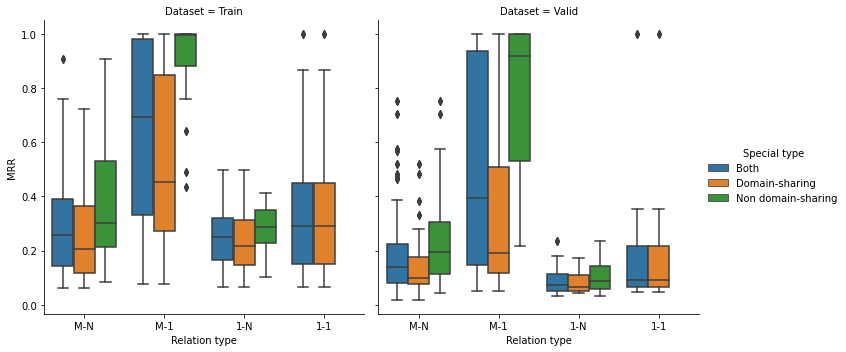

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

sthg_fun = result_objects_plt.copy()
sthg_fun['type'] = sthg_fun.name_relation.map(lambda x: 'Domain-sharing' if x in list_relation_in_so else 'Non domain-sharing')
sthg_fun['eval_type'] = sthg_fun.eval_type.map(lambda x: x.capitalize())
sthg_fun_2 = sthg_fun.copy()
sthg_fun_2['type'] = 'Both'

plt.figure(figsize=(10, 20), dpi=180)
ax = sns.catplot(
    x='Relation type', y='MRR', 
    hue='Special type', col='Dataset', 
    kind='box', 
    data=pd.concat([sthg_fun_2, sthg_fun]).rename(columns={'MRR_standard': 'MRR', 
                                                           'relation_type': 'Relation type',
                                                           'type': 'Special type',
                                                           'eval_type': 'Dataset'}))
ax.savefig("MRR_relation_in_so_pairs (standard entity).png", dpi=180)

<Figure size 1800x3600 with 0 Axes>

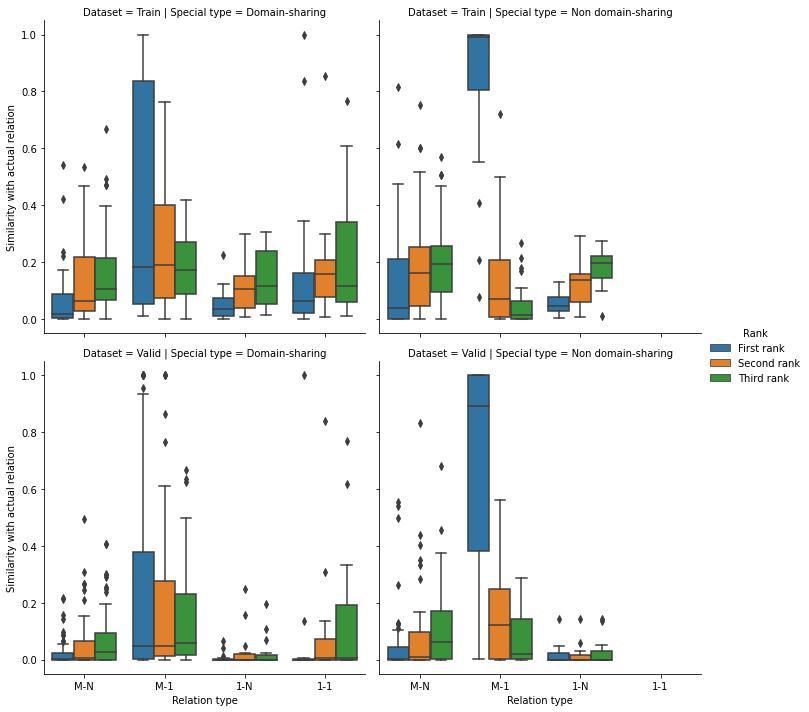

In [27]:
domain_similarity = pd.concat([result_subjects_plt, result_objects_plt])
domain_similarity = domain_similarity.groupby(['name_relation', 'relation_type', 'eval_type', 'MRR_standard', 'rank']).mean().reset_index()
domain_similarity['type'] = domain_similarity.name_relation.map(lambda x: 'Domain-sharing' if x in list_relation_in_so else 'Non domain-sharing')
domain_similarity['eval_type'] = domain_similarity.eval_type.map(lambda x: x.capitalize())
domain_similarity
# domain_similarity = domain_similarity.melt(id_vars=['name_relation', 'relation_type', 'eval_type', 'type', 'MRR_standard'],
#                                            value_vars=['First rank', 'Second rank', 'Third rank'], 
#                                             var_name='rank', value_name='jaccard_sim')
# domain_similarity
plt.figure(figsize=(10, 20), dpi=180)
ax = sns.catplot(x='Relation type', y='jaccard_sim', 
                 hue='Rank', row='Dataset', col='Special type',
                 kind='box', data=domain_similarity.rename(columns={'MRR_standard': 'MRR', 
                                                                    'relation_type': 'Relation type',
                                                                    'type': 'Special type',
                                                                    'eval_type': 'Dataset',
                                                                    'rank': 'Rank'}),
                 order=['M-N', 'M-1', '1-N', '1-1'],
                 )
ax.set(xlabel='Relation type', ylabel='Similarity with actual relation')
ax.savefig("jaccard_similarity (standard entity).png", dpi=180)

In [35]:
df_ranking_training[df_ranking_training.name_subjects == 'Joe Hisaishi']

,id,name_subjects,name_relation,name_objects,relation_type,triplet,po_to_s_hybrid,po_to_s_standard,predicted_object_hybrid,predicted_object_scores_hybrid,...,predicted_subject_score_hybrid,predicted_subject_score_standard,predicted_subject_standard,so_to_p_hybrid,so_to_p_standard,sp_to_o_hybrid,sp_to_o_standard,eval_type,MRR_standard,MRR_hybrid
222,222,Joe Hisaishi,/people/person/places_lived./people/place_live...,Nagano Prefecture,M-N,Joe Hisaishi | /people/person/places_lived./pe...,0,0,['Nagano Prefecture' 'Tokyo' 'Yokohama' 'Count...,"[14.669342994689941, 8.355384826660156, 6.8727...",...,"[14.669342994689941, 8.665081024169922, 7.8610...","[15.812482833862305, 7.829617023468018, 7.8051...",['Joe Hisaishi' 'Jun Fukuyama' 'Shotaro Ishino...,0,6,0,0,train,0.108219,1.0
26747,26747,Joe Hisaishi,/award/award_nominee/award_nominations./award/...,Ponyo,M-N,Joe Hisaishi | /award/award_nominee/award_nomi...,0,0,"['Ponyo' 'My Neighbor Totoro' ""Howl's Moving C...","[13.617227554321289, 9.524391174316406, 9.2235...",...,"[14.556934356689453, 13.617227554321289, 7.096...","[15.72643756866455, 15.258753776550293, 10.171...",['Joe Hisaishi' 'Hayao Miyazaki' 'Kathleen Ken...,0,3,0,0,train,0.148432,1.0
51243,51243,Joe Hisaishi,/people/person/spouse_s./people/marriage/type_...,Marriage (Quotation Subject),M-1,Joe Hisaishi | /people/person/spouse_s./people...,1,0,['Marriage (Quotation Subject)' 'Domestic part...,"[11.754230499267578, 4.645901203155518, 2.6490...",...,"[12.855995178222656, 12.808669090270996, 12.75...","[7.191172122955322, 7.189597129821777, 7.13030...",['Geena Davis' 'Vince Gill' 'Keenan Wynn' 'Geo...,0,0,0,0,train,0.768116,1.0
67600,67600,Joe Hisaishi,/people/person/profession,Music director,M-N,Joe Hisaishi | /people/person/profession | Mus...,0,0,['Music director' 'Conductor' 'Composer' 'Song...,"[11.426861763000488, 11.319098472595215, 9.245...",...,"[11.614784240722656, 11.485367774963379, 11.47...","[11.321690559387207, 11.274285316467285, 11.25...",['Bappi Lahiri' 'Kirk Franklin' 'Joe Hisaishi'...,0,3,0,0,train,0.208030,1.0
79836,79836,Joe Hisaishi,/music/artist/track_contributions./music/track...,Piano,M-N,Joe Hisaishi | /music/artist/track_contributio...,0,0,['Electronic keyboard' 'Piano' 'Keyboard' 'Gui...,"[12.357501983642578, 12.165122985839844, 9.399...",...,"[13.02482795715332, 13.001713752746582, 12.981...","[15.008411407470703, 15.000823020935059, 14.98...",['Billy Preston' 'John Paul Jones' 'Mike Mills...,0,3,0,0,train,0.478609,1.0
110605,110605,Joe Hisaishi,/people/person/gender,Male,M-1,Joe Hisaishi | /people/person/gender | Male,0,0,['Male' 'Female' 'Pakistan' 'Economics' 'Unite...,"[11.535104751586914, 4.2545881271362305, 2.045...",...,"[12.70792293548584, 12.69894027709961, 12.6793...","[5.817002296447754, 5.7316179275512695, 5.6621...",['Prince' 'Steven Spielberg' 'Frank Marshall' ...,0,1,0,0,train,0.959645,1.0
171230,171230,Joe Hisaishi,/music/artist/track_contributions./music/track...,Electronic keyboard,M-N,Joe Hisaishi | /music/artist/track_contributio...,0,0,['Electronic keyboard' 'Piano' 'Keyboard' 'Gui...,"[12.357501983642578, 12.165122985839844, 9.399...",...,"[13.07047176361084, 13.06422233581543, 13.0045...","[15.069307327270508, 15.048641204833984, 15.01...",['Gary Numan' 'Steven Tyler' 'Kate Bush' 'Dave...,0,3,0,0,train,0.478609,1.0
225803,225803,Joe Hisaishi,/people/person/profession,Conductor,M-N,Joe Hisaishi | /people/person/profession | Con...,0,0,['Music director' 'Conductor' 'Composer' 'Song...,"[11.426861763000488, 11.319098472595215, 9.245...",...,"[11.977751731872559, 11.931556701660156, 11.72...","[11.485836029052734, 11.411312103271484, 11.39...",['John Williams' 'Joe Hisaishi' 'Harry Connick...,0,3,0,0,train,0.208030,1.0
234477,234477,Joe Hisaishi,/people/person/nationality,Japan,M-1,Joe Hisaishi | /people/person/nationality | Japan,0,0,['Japan' 'United States of America' 'Germany' ...,"[12.060699462890625, 7.919989585876465, 7.3707...",...,"[13.487780570983887, 12.991067886352

In [37]:
## some examples of domain-sharing relations
type_of_relation = '1-N'
list_interesting_relations = domain_similarity[(domain_similarity.type == 'Domain-sharing') 
                  & (domain_similarity['rank'] == 'First rank')
                  # & (domain_similarity.jaccard_sim <= 0.6)
                  ].name_relation.unique()
# list_interesting_relations = ['/people/person/places_lived./people/place_lived/location']

df_std_er_ranking[ df_std_er_ranking.name_relation.isin(list_interesting_relations) 
                      & df_std_er_ranking.relation_type.isin([type_of_relation]) 
                      & ~df_std_er_ranking.so_to_p_standard.isin([0, 1, 2]) 
                    #   & (df_std_er_ranking.name_subjects != df_std_er_ranking.name_objects)
                      # & df_std_er_ranking.predicted_relation_type_standard.isin([(type_of_relation, type_of_relation, type_of_relation)])
                      ]\
                          .set_index(['name_relation', 'relation_type', 
                                      'predicted_relation_standard', 'predicted_relation_type_standard'])

,,,,name_subjects,name_objects,eval_type,so_to_p_standard,MRR_standard
name_relation,relation_type,predicted_relation_standard,predicted_relation_type_standard,,,,,
/people/cause_of_death/people,1-N,"(/base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /film/person_or_entity_appearing_in_film/films./film/personal_film_appearance/type_of_appearance, /film/film/estimated_budget./measurement_unit/dated_money_value/currency)","(M-1, M-1, M-1)",Cancer (Disease or medical condition),Laurence Olivier,train,12,0.218565
/tv/tv_program/regular_cast./tv/regular_tv_appearance/actor,1-N,"(/base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /location/statistical_region/gni_per_capita_in_ppp_dollars./measurement_unit/dated_money_value/currency, /location/statistical_region/gdp_real./measurement_unit/adjusted_money_value/adjustment_currency)","(M-1, M-1, M-1)",Gulliver's Travels (Fantasy Film),Peter O'Toole,train,7,0.145519
/organization/role/leaders./organization/leadership/organization,1-N,"(/user/tsegaran/random/taxonomy_subject/entry./user/tsegaran/random/taxonomy_entry/taxonomy, /location/statistical_region/gdp_nominal./measurement_unit/dated_money_value/currency, /time/event/instance_of_recurring_event)","(M-1, M-1, M-1)",President,Hampton University,train,3,0.310792
/base/locations/continents/countries_within,1-N,"(/location/administrative_division/first_level_division_of, /location/administrative_division/country, /base/locations/continents/countries_within)","(M-1, M-1, 1-N)",Europe,Poland,train,16,0.064927
/tv/tv_program/regular_cast./tv/regular_tv_appearance/actor,1-N,"(/base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /film/film/costume_design_by, /film/film/film_production_design_by)","(M-1, M-1, M-1)",Boardwalk Empire,Michael Pitt,train,8,0.145519
...,...,...,...,...,...,...,...,...
/film/film_subject/films,1-N,"(/education/educational_institution/campuses, /education/educational_institution/campuses, /location/hud_county_place/place)","(1-1, 1-1, 1-1)",Second Sino-Japanese War,Empire of the Sun (Coming of age Film),valid,9,0.117129
/award/hall_of_fame/inductees./award/hall_of_fame_induction/inductee,1-N,"(/base/locations/continents/countries_within, /film/film/runtime./film/film_cut/film_release_region, /education/educational_institution/campuses)","(1-N, M-1, 1-1)",Rock and Roll Hall of Fame,Pretenders,valid,4,0.110743
/tv/tv_program/regular_cast./tv/regular_tv_appearance/actor,1-N,"(/base/schemastaging/person_extra/net_worth./measurement_unit/dated_money_value/currency, /location/hud_county_place/place, /user/tsegaran/random/taxonomy_subject/entry./user/tsegaran/random/taxonomy_entry/taxonomy)","(M-1, 1-1, M-1)",Jesus of Nazareth,Claudia Cardinale,valid,33,0.052934
